# Fitbit Downloader

### About Fitbit Data Downloader: 

File provides a way to download your fitbit data to CSV, including heart rate, sleep, sleeps and weight. Some simple visualizations are used to check numbers. See fitbit data analysis file for more in-depth data visualizations.

### Setup and Installation Steps

Getting the Credentials setup for FitBit integration is a bit annoying, but if you fall these steps, it should work. 

* Create a developer application at https://dev.fitbit.com/ 
* Set your callback URL as http://127.0.0.1:8080/
* From your Fitbit application, copy your "OAuth 2.0 Client ID" and "Client Secret" 
* Install Python Fitbit: `$ pip install fitbit`
* Clone or Download https://github.com/orcasgit/python-fitbit
* Navigate to python-fitbit directory and install the dependencies with `$ sudo pip install -r requirements/base.txt`
* Inside python-fitbit directory run this command `$ python gather_keys_oauth2.py <client-id> <client-secret>`
* This should redirect you to fitbit website where you you will signin and authorize your user. 
* After you will be redirected to your localhost url. Inside the terminal, you will receive a message that includes your token info. Copy all the info. 
* Copy credentials-sample.json to credentials.json
* Inside credentials-sample.json add your info. 


## Acknowledgements and Helpful Resources

* [Collect Your Own Fitbit Data with Python](https://towardsdatascience.com/collect-your-own-fitbit-data-with-python-ff145fa10873) and [Code](https://github.com/stephenjhsu/fitbit) by Stephen Hsu
* 

### Libraries and Dependencies

In [1]:
import fitbit
# import gather_keys_oauth2 as Oauth2
import numpy as np
import pandas as pd 
import datetime
import dateutil.parser
import seaborn
import time
%matplotlib inline

### Credentials and Authentification

In [2]:
import json

with open("credentials.json", "r") as file:
    credentials = json.load(file)
    fitbit_cr = credentials['fitbit']
    CLIENT_SECRET = fitbit_cr['CLIENT_SECRET']
    CLIENT_ID = fitbit_cr['CLIENT_ID']
    USER_ID = fitbit_cr['USER_ID']
    ACCESS_TOKEN = fitbit_cr['ACCESS_TOKEN']
    REFRESH_TOKEN = fitbit_cr['REFRESH_TOKEN']

In [3]:
#Authorization info
auth2_client = fitbit.Fitbit(USER_ID, CLIENT_SECRET, oauth2=True, access_token=ACCESS_TOKEN, refresh_token=REFRESH_TOKEN)

### Current Day Today and Yesterday

In [4]:
# Get Today and Yesterday Dates in FitBit Ready Formats
yesterday = str((datetime.datetime.now() - datetime.timedelta(days=1)).strftime("%Y%m%d"))
yesterday = str((datetime.datetime.now() - datetime.timedelta(days=1)).strftime("%Y-%m-%d"))
today = str(datetime.datetime.now().strftime("%Y-%m-%d"))
today

'2019-07-21'

### Customizable Date Range 

In [14]:
# list of dates to check
dates_list = []
date1 = '2019-06-01' # Got Fitbit Device 2018-04-17 or since last data update
date2 = today
start = datetime.datetime.strptime(date1, '%Y-%m-%d')
end = datetime.datetime.strptime(date2, '%Y-%m-%d')
step = datetime.timedelta(days=1)

while start <= end:
    dates_list.append(start.date().strftime("%Y-%m-%d"))
    start += step

# Download Daily Steps Data

In [41]:
# Get Steps Data in JSON from Last Year
steps_ts = auth2_client.time_series('activities/steps', period='1y')

# base-date: The range start date, in the format yyyy-MM-dd or today.
# end-date: The end date of the range.
# date: The end date of the period specified in the format yyyy-MM-dd or today.
# period: The range for which data will be returned. Options are 1d, 7d, 30d, 1w, 1m, 3m, 6m, 1y

In [6]:
steps_ts['activities-steps'][-2]

{'dateTime': '2019-07-20', 'value': '5770'}

In [7]:
date_steps_list = [(dateutil.parser.parse(date_steps_dict['dateTime']), int(date_steps_dict['value']))
              for date_steps_dict in steps_ts['activities-steps']]
date_steps_list[-2]

(datetime.datetime(2019, 7, 20, 0, 0), 5770)

In [8]:
len(date_steps_list) # 365 days

365

In [9]:
# convert to data frame
date_steps = pd.DataFrame(date_steps_list, columns=('Date', 'Steps'))

In [10]:
date_steps.tail()

,Date,Steps
360,2019-07-17,772
361,2019-07-18,2736
362,2019-07-19,6168
363,2019-07-20,5770
364,2019-07-21,122


In [11]:
# days with steps
len(date_steps[date_steps.Steps > 0])

360

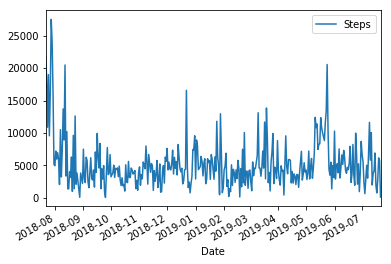

In [12]:
# Days with Steps Visualization
date_steps[date_steps.Steps > 0].plot(x='Date')

In [116]:
# save to csv
date_steps.to_csv('data/daily_steps.csv', index=None, encoding='utf-8')

------

# Weight 

In [117]:
# TODO: https://dev.fitbit.com/build/reference/web-api/body/

----------

# Download Steps Per 15min via Intraday API

In [118]:
# get all Steps stats for a single date
def fitbit_intraday_steps(date):
    fitbit_intra_steps = auth2_client.intraday_time_series('activities/steps', base_date=date, detail_level='15min')
    time_list = []
    val_list = []
    for i in fitbit_intra_steps['activities-steps-intraday']['dataset']:
        val_list.append(i['value'])
        time_list.append(i['time'])
    heartdf = pd.DataFrame({'Steps':val_list,'Time':time_list})
    # add date column
    heartdf['Date'] = date
    # create csv
    heartdf.to_csv('data/steps/steps'+ \
               date+'.csv', \
               columns=['Date', 'Time','Steps'], header=True, \
               index = False)
    print("Generated Steps CSV for %s" % date)

In [119]:
# get multiple date HR data
def fitbit_multidates_steps(datelist):
    for i in datelist[:]:
        fitbit_intraday_steps(i)
        # add a 5 second daily
        # time.sleep(5)

In [120]:
fitbit_intraday_steps(today)

Generated Steps CSV for 2018-05-23


In [121]:
fitbit_intraday_steps(yesterday)

Generated Steps CSV for 2018-05-22


In [122]:
fitbit_multidates_steps(dates_list)

Generated Steps CSV for 2018-04-17
Generated Steps CSV for 2018-04-18
Generated Steps CSV for 2018-04-19
Generated Steps CSV for 2018-04-20
Generated Steps CSV for 2018-04-21
Generated Steps CSV for 2018-04-22
Generated Steps CSV for 2018-04-23
Generated Steps CSV for 2018-04-24
Generated Steps CSV for 2018-04-25
Generated Steps CSV for 2018-04-26
Generated Steps CSV for 2018-04-27
Generated Steps CSV for 2018-04-28
Generated Steps CSV for 2018-04-29
Generated Steps CSV for 2018-04-30
Generated Steps CSV for 2018-05-01
Generated Steps CSV for 2018-05-02
Generated Steps CSV for 2018-05-03
Generated Steps CSV for 2018-05-04
Generated Steps CSV for 2018-05-05
Generated Steps CSV for 2018-05-06
Generated Steps CSV for 2018-05-07
Generated Steps CSV for 2018-05-08
Generated Steps CSV for 2018-05-09
Generated Steps CSV for 2018-05-10
Generated Steps CSV for 2018-05-11
Generated Steps CSV for 2018-05-12
Generated Steps CSV for 2018-05-13
Generated Steps CSV for 2018-05-14
Generated Steps CSV 

--------

# Download Daily Detailed Sleep Log

In [128]:
sleep_daily = [auth2_client.sleep(date) for date in dates_list]

In [210]:
sleep_daily[-2]

{'sleep': [{'awakeCount': 3,
   'awakeDuration': 10,
   'awakeningsCount': 17,
   'dateOfSleep': '2019-07-20',
   'duration': 32040000,
   'efficiency': 93,
   'endTime': '2019-07-20T08:12:30.000',
   'isMainSleep': True,
   'logId': 23160192238,
   'minuteData': [{'dateTime': '23:18:30', 'value': '1'},
    {'dateTime': '23:19:30', 'value': '1'},
    {'dateTime': '23:20:30', 'value': '1'},
    {'dateTime': '23:21:30', 'value': '1'},
    {'dateTime': '23:22:30', 'value': '1'},
    {'dateTime': '23:23:30', 'value': '1'},
    {'dateTime': '23:24:30', 'value': '1'},
    {'dateTime': '23:25:30', 'value': '1'},
    {'dateTime': '23:26:30', 'value': '1'},
    {'dateTime': '23:27:30', 'value': '1'},
    {'dateTime': '23:28:30', 'value': '1'},
    {'dateTime': '23:29:30', 'value': '2'},
    {'dateTime': '23:30:30', 'value': '2'},
    {'dateTime': '23:31:30', 'value': '2'},
    {'dateTime': '23:32:30', 'value': '3'},
    {'dateTime': '23:33:30', 'value': '3'},
    {'dateTime': '23:34:30', 'value

In [ ]:
```{'sleep': [{'awakeCount': 3,
   'awakeDuration': 10,
   'awakeningsCount': 17,
   'dateOfSleep': '2019-07-20',
   'duration': 32040000,
   'efficiency': 93,
   'endTime': '2019-07-20T08:12:30.000',
   'isMainSleep': True,
   'logId': 23160192238,
   'minuteData': [{'dateTime': '23:18:30', 'value': '1'},
    {'dateTime': '23:19:30', 'value': '1'},
    {'dateTime': '08:11:30', 'value': '1'}],
   'minutesAfterWakeup': 0,
   'minutesAsleep': 496,
   'minutesAwake': 38,
   'minutesToFallAsleep': 0,
   'restlessCount': 14,
   'restlessDuration': 28,
   'startTime': '2019-07-19T23:18:30.000',
   'timeInBed': 534}],
 'summary': {'stages': {'deep': 61, 'light': 260, 'rem': 122, 'wake': 91},
  'totalMinutesAsleep': 496,
  'totalSleepRecords': 1,
  'totalTimeInBed': 534}}```

minuteData Value
 1 ("asleep"), 2 ("restless"), or 3 ("awake").
    
# for more about stages: https://dev.fitbit.com/build/reference/web-api/sleep/

### Sleep Duration Total (original)

In [18]:
# sleep minutes
sleep_minutes = [sleep_entry['summary']['totalMinutesAsleep'] for sleep_entry in sleep_daily]

# in-bed minutes
inbed_minutes = [sleep_entry['summary']['totalTimeInBed'] for sleep_entry in sleep_daily]

# sleep_minutes[-3]
date_sleep = pd.DataFrame({'Date': dates_list, 'Sleep': sleep_minutes, 'InBed': inbed_minutes})

In [31]:
date_sleep.head()

,Date,Sleep,Hours
0,2019-06-01,438,7.30
1,2019-06-02,492,8.20
2,2019-06-03,397,6.62
3,2019-06-04,473,7.88
4,2019-06-05,498,8.30


### In Bed 

In [211]:
# # List Comprehension
# [value['endTime'] for sleep_entry in sleep_daily for value in sleep_entry['sleep']]

# # For loop
# for sleep_entry in sleep_daily:
#     for value in sleep_entry['sleep']:
#         print(value['endTime'])

In [194]:
# Start of in-bed
date_start = [value['startTime'] for sleep_entry in sleep_daily for value in sleep_entry['sleep']]

# End of in-bed
date_end = [value['endTime'] for sleep_entry in sleep_daily for value in sleep_entry['sleep']]

# in-bed minutes 'timeInBed'
inbed_minutes = [value['timeInBed'] for sleep_entry in sleep_daily for value in sleep_entry['sleep']]

sleep_data = pd.DataFrame({'Date Start': date_start, 'Date End': date_end, 'InBed Minutes': inbed_minutes, 'Category': 'inBed'})
sleep_data['Date Start'] = pd.to_datetime(sleep_data['Date Start'])
sleep_data['Date End'] = pd.to_datetime(sleep_data['Date End'])

sleep_data['Date Abr'] = sleep_data['Date Start'].dt.date

sleep_data.head()

,Date Start,Date End,InBed Minutes,Category,Date Abr
0,2019-05-31 22:55:00,2019-06-01 06:40:30,465,inBed,2019-05-31
1,2019-06-01 23:22:00,2019-06-02 08:31:30,549,inBed,2019-06-01
2,2019-06-02 23:30:00,2019-06-03 06:33:00,423,inBed,2019-06-02
3,2019-06-03 22:53:30,2019-06-04 07:12:00,498,inBed,2019-06-03
4,2019-06-04 23:03:30,2019-06-05 07:47:00,523,inBed,2019-06-04


In [152]:
sleep_data.dtypes

Date Start       datetime64[ns]
Date End         datetime64[ns]
InBed Minutes             int64
Category                 object
dtype: object

### In Bed Details

In [364]:
sleep_dateOfSleep = [feature['dateOfSleep'] 
                         for sleep_entry in sleep_daily 
                         for feature in sleep_entry['sleep']
                         for time_detail in feature['minuteData']
                        ]

sleep_minuteData_dateTime = [time_detail['dateTime'] 
                         for sleep_entry in sleep_daily 
                         for feature in sleep_entry['sleep']
                         for time_detail in feature['minuteData']
                        ]

sleep_minuteData_value = [time_detail['value'] 
                     for sleep_entry in sleep_daily 
                     for feature in sleep_entry['sleep']
                     for time_detail in feature['minuteData']
                    ]


bd = pd.DataFrame({'Date': sleep_dateOfSleep, 'Time': sleep_minuteData_dateTime, 'InBed Value': sleep_minuteData_value})

bd['InBed Value'] = bd['InBed Value'].astype(int)
bd['Date Abr'] = pd.to_datetime(bd['Date'])

bd['Date Start'] = pd.to_datetime(bd['Date'] + ' ' + bd['Time'])
# hack (every entry is a minute long)
bd['Seconds'] = 59
bd['Date End'] = bd['Date Start'] + pd.to_timedelta(bd['Seconds'], unit='s')

# bd['Time'] = pd.to_datetime(bd['Time'], format='%H:%M:%S').dt.time

bd['InBed Activity'] = np.where(bd['InBed Value'] == 1, 'asleep',
                                np.where(bd['InBed Value'] == 2, 'restless',
                                         'awake'
                                        )
                               )

bd.head()

,Date,Time,InBed Value,Date Abr,Date Start,Seconds,Date End,InBed Activity
0,2019-06-01,22:55:00,1,2019-06-01,2019-06-01 22:55:00,59,2019-06-01 22:55:59,asleep
1,2019-06-01,22:56:00,1,2019-06-01,2019-06-01 22:56:00,59,2019-06-01 22:56:59,asleep
2,2019-06-01,22:57:00,1,2019-06-01,2019-06-01 22:57:00,59,2019-06-01 22:57:59,asleep
3,2019-06-01,22:58:00,1,2019-06-01,2019-06-01 22:58:00,59,2019-06-01 22:58:59,asleep
4,2019-06-01,22:59:00,1,2019-06-01,2019-06-01 22:59:00,59,2019-06-01 22:59:59,asleep


In [365]:
bd.dtypes

Date                      object
Time                      object
InBed Value                int64
Date Abr          datetime64[ns]
Date Start        datetime64[ns]
Seconds                    int64
Date End          datetime64[ns]
InBed Activity            object
dtype: object

In [366]:
# Check: is each inBed Value unique
adf = bd.groupby(['Date Start'])['InBed Activity'].nunique().reset_index()
adf.sort_values('InBed Activity', ascending = False).head()

,Date Start,InBed Activity
0,2019-06-01 00:00:00,1
17136,2019-07-04 03:35:00,1
17146,2019-07-04 03:45:00,1
17145,2019-07-04 03:44:00,1
17144,2019-07-04 03:43:00,1


In [367]:
adf = bd[bd['InBed Value'] == 3].groupby(['Date Abr'])['InBed Activity'].count().reset_index()
adf.sort_values('InBed Activity', ascending = False).head()

,Date Abr,InBed Activity
29,2019-07-02,17
41,2019-07-17,15
12,2019-06-13,14
11,2019-06-12,13
27,2019-06-30,12


In [368]:
adf = bd[bd['InBed Value'] == 1].groupby(['Date Abr'])['InBed Activity'].count().reset_index()
adf.sort_values('Date Abr', ascending = False).head()

,Date Abr,InBed Activity
49,2019-07-21,405
48,2019-07-20,496
47,2019-07-19,391
46,2019-07-18,532
45,2019-07-17,550


In [369]:
405/60

6.75

In [370]:
60*.75

45.0

In [371]:
adf = bd[bd['InBed Value'] == 2].groupby(['Date Abr'])['InBed Activity'].count().reset_index()
adf.sort_values('Date Abr', ascending = False).head()

,Date Abr,InBed Activity
49,2019-07-21,8
48,2019-07-20,28
47,2019-07-19,40
46,2019-07-18,62
45,2019-07-17,74


## Prep for Visualization

In [372]:
# Minimum Requirement: Start Date, End Date, and Category
df = sleep_data

### Step 0: Set Up Variables
start_date = '2019-07-10'  # Start date for data
end_date   = '2019-07-21'  # End date for data

# General Column Variable Names
start_date_column = 'Date Start'
end_date_column = 'Date End'
category_column = 'Category' 

In [373]:
# Minimum Requirement: Start Date, End Date, and Category
df = bd

### Step 0: Set Up Variables
start_date = '2019-07-10'  # Start date for data
end_date   = '2019-07-21'  # End date for data

# General Column Variable Names
start_date_column = 'Date Start'
end_date_column = 'Date End'
category_column = 'InBed Activity' 

In [494]:
### Step 1: Find Data Gaps
# Create a temporary dataframe of the end dates
df_end = df[[end_date_column]].copy()
# Add a column category with the field value 'No Entry'
df_end[category_column] = 'No Entry'

# If there is no gap in data (as in there is an entry immediately following the previous),
# remove the the record from the df_end dataframe
start_date_pt_list = list(df[start_date_column].unique())
df_end = df_end[~df_end[end_date_column].isin(start_date_pt_list)]



### Step 2: Combine End and Start Dates into single column
# Create a two column data frame with the start date and the category
df_start = df[[start_date_column, category_column]].copy()


### Step 2.5: 
# Update column names to match that of df_start
df_end.rename(columns = {end_date_column: start_date_column}, inplace = True)
                         
# Add the df_end dataframe to the bottom
df_mini_entries = pd.concat([df_start, df_end])


##------------------------------##

### STEP 3: Expand Dataset - Every Second
# Create a dataframe of second intevals between two dates   
time_range = pd.date_range(start_date, end_date, freq= '1s')
time_range_df = pd.DataFrame(time_range).rename(columns = {0: 'date_time'})

# Convert to time
time_range_df['date_time'] = pd.to_datetime(time_range_df['date_time'])

# Replace time zone
# time_range_df['date_time'] = [row.replace(tzinfo=from_zone).astimezone(to_zone) for row in time_range_df['date_time']]

# Left Join our mini dataframe to this range 
df_seconds = pd.merge(time_range_df, df_mini_entries, how = 'left',  left_on = 'date_time', right_on = start_date_column)

# Find the first date_time with a category entry
date_of_first_entry = df_seconds[~df_seconds[category_column].isnull()]['date_time'].min()
# Find the index of the first entry
index_of_first_entry = df_seconds.index[df_seconds[start_date_column]==date_of_first_entry][0]

# Reduce the dataframe to begin with the first entry
df_seconds = df_seconds[index_of_first_entry:].copy()



### Step 4: Categorize every minute
# Forward fill the category until next entry
df_seconds[category_column] = df_seconds[category_column].ffill()

df_seconds[start_date_column] = df_seconds[start_date_column].ffill()

In [495]:
df_seconds.head()

,date_time,Date Start,InBed Activity
86400,2019-07-11 00:00:00,2019-07-11,asleep
86401,2019-07-11 00:00:01,2019-07-11,asleep
86402,2019-07-11 00:00:02,2019-07-11,asleep
86403,2019-07-11 00:00:03,2019-07-11,asleep
86404,2019-07-11 00:00:04,2019-07-11,asleep


In [376]:
list(df_seconds[category_column].unique())

['asleep', 'No Entry', 'restless', 'awake']

In [403]:
# Check
d = df_seconds
d['date'] = d['Date Start'].dt.date

adf = d[d['InBed Activity'] == 'restless'].groupby(['date'])['InBed Activity'].count().reset_index()
adf['hours'] = adf['InBed Activity']/(60*60)
adf.sort_values('date', ascending = False).head()

,date,InBed Activity,hours
9,2019-07-20,1652,0.458889
8,2019-07-19,2360,0.655556
7,2019-07-18,3658,1.016111
6,2019-07-17,4366,1.212778
5,2019-07-16,3068,0.852222


# Chart Category Prep

In [377]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

import warnings
warnings.filterwarnings("ignore")

In [378]:
fsize = 18
params = {
    'legend.fontsize': fsize*0.925, 
    'axes.labelsize': fsize, 
    'axes.titlesize':fsize, 
    'xtick.labelsize':fsize, 
    'ytick.labelsize':fsize,
    'lines.linewidth' : 3,
    'figure.titlesize': fsize *1.2,
    'figure.figsize' : (8,8)
} 
plt.rcParams.update(params) 
plt.close('all') 

20


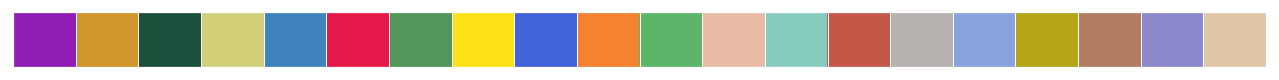

In [379]:
color_palette_p = [
    '#911eb4', 
    '#d1952e',
    "#1B503C",
    "#D2D179",
    "#4084BF", 
    
    '#e6194b', 
    '#52965b', 
    '#ffe119', 
    '#4363d8', 
    '#f58231',
    
    "#5cb569",
    "#e8bca7",
    "#88ccbf",
    '#c45748',
    '#b7b1b0',
    
    '#8ba3dd',
    '#b7a519',
    '#b27c62',
    '#8b88cc', 
    '#e0c8a6'
]
print(len(color_palette_p))
sns.palplot(color_palette_p)

# pal50 = sns.color_palette(color_palette_p, 50)
# len(pal50)

In [380]:
# Set up variables
d = df_seconds
date_time_column = 'date_time'
category_column = category_column

select_all_categories = True #False
specified_category_entries = ['inBed'] #, 'Social Networking']

date_range_start = start_date
date_range_end = end_date

colors = color_palette_p

In [438]:
# Set up variables
d = df_seconds
date_time_column = 'date_time'
category_column = category_column

select_all_categories = True #False
specified_category_entries = ['asleep', 'restless'] #, 'Social Networking']

date_range_start = start_date
date_range_end = end_date

colors = color_palette_p

In [439]:
category_column

'InBed Activity'

In [440]:
d = d[(d[date_time_column] >= date_range_start) & (d[date_time_column] <= date_range_end)].copy()

### X & Y Axis
# x-axis time periods
d['Date Abr'] = d['date_time'].dt.date

# y-axis scaled for 24 hour period
d['time_from_day_start'] = (d[date_time_column] - d[date_time_column].dt.normalize()).dt.total_seconds().fillna(0)/(60*60)

### Colors & Categories
category_list = list(d[category_column].unique())
category_list_minus = category_list
category_list_minus.remove('No Entry') 
# Zip colors
color_pairs = dict(zip(category_list_minus, colors))

# from itertools import zip_longest
# color_pairs  = dict(zip_longest(category_list, color_palette_p, fillvalue = '#e0c8a6'))

if select_all_categories == False:
    ### Select Categories                              
    # Create a list where all but the specified entries are included
    category_list_remaining = category_list.copy()
    [category_list_remaining.remove(x) for x in specified_category_entries]
    # Convert all the not specified entries to the same color (make it easier to visually inspect for patterns)
    color_pairs.update(dict.fromkeys(category_list_remaining, '#e8e8e8'))

# Add back in 'No Entry' with specified color
color_pairs['No Entry'] = '#ffffff'
# Ordered categories and colors
category_list_names_ordered = [key for (key, value) in sorted(color_pairs.items())]
color_palette = [value for (key, value) in sorted(color_pairs.items())]

In [441]:
d.sort_values('date_time', ascending = False).head()

,date_time,Date Start,InBed Activity,date,Date Abr,time_from_day_start
950400,2019-07-21 00:00:00,2019-07-20 23:59:30,asleep,2019-07-20,2019-07-21,0.000000
950399,2019-07-20 23:59:59,2019-07-20 23:59:30,asleep,2019-07-20,2019-07-20,23.999722
950398,2019-07-20 23:59:58,2019-07-20 23:59:30,asleep,2019-07-20,2019-07-20,23.999444
950397,2019-07-20 23:59:57,2019-07-20 23:59:30,asleep,2019-07-20,2019-07-20,23.999167
950396,2019-07-20 23:59:56,2019-07-20 23:59:30,asleep,2019-07-20,2019-07-20,23.998889


In [442]:
d[category_column].unique()

array(['asleep', 'No Entry', 'restless', 'awake'], dtype=object)

In [443]:
# Check
d = d
# d['date'] = d['Date Start'].dt.date

adf = d[d['InBed Activity'] == 'asleep'].groupby(['Date Abr'])['InBed Activity'].count().reset_index()
adf['hours'] = adf['InBed Activity']/(60*60)
adf.sort_values('Date Abr', ascending = False).head()

,Date Abr,InBed Activity,hours
10,2019-07-21,1,0.000278
9,2019-07-20,29235,8.120833
8,2019-07-19,23069,6.408056
7,2019-07-18,31388,8.718889
6,2019-07-17,32450,9.013889


# Chart

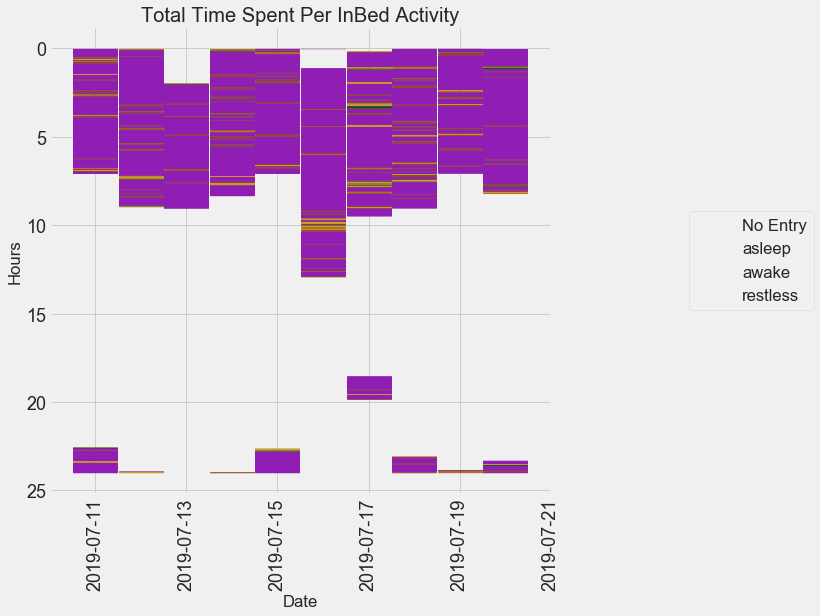

In [491]:

plt.style.use('fivethirtyeight')

v_val= 0
h_val= 200
verts = list(zip([-h_val,h_val,h_val,-h_val],[-v_val,-v_val,v_val,v_val]))

for i in range(len(category_list)+1):
    plt.scatter(d[d[category_column] == category_list_names_ordered[i]]['Date Abr'], 
            d[d[category_column] == category_list_names_ordered[i]]['time_from_day_start'], 
            s = 2000,
            c=color_palette[i],
            marker=(verts, 0),
            alpha=0.01
            )
plt.xticks(rotation=90)
plt.xlim(date_range_start, date_range_end)


plt.legend(category_list_names_ordered, bbox_to_anchor=(1.4,0.5), loc="center")
plt.ylabel('Hours')
plt.gca().invert_yaxis()
plt.xlabel('Date')
plt.title('Total Time Spent Per ' + category_column)
plt.show()

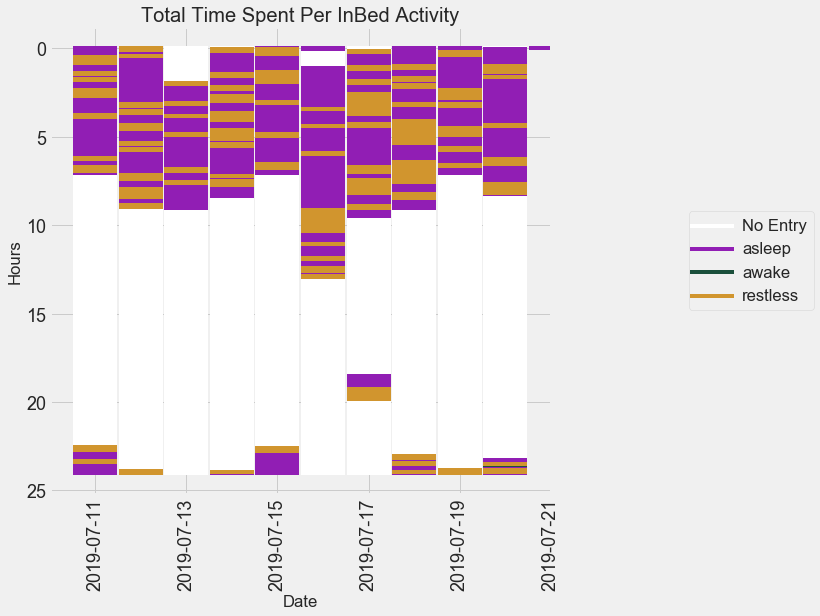

In [486]:
alpha_strength = .5

plt.style.use('fivethirtyeight')

for i in range(len(category_list)+1):
    plt.scatter(d[d[category_column] == category_list_names_ordered[i]]['Date Abr'], 
            d[d[category_column] == category_list_names_ordered[i]]['time_from_day_start'], 
            s = 2000,
            c=color_palette[i],
            marker = '_',
            )
plt.xticks(rotation=90)
plt.xlim(date_range_start, date_range_end)


plt.legend(category_list_names_ordered, bbox_to_anchor=(1.4,0.5), loc="center")
plt.ylabel('Hours')
plt.gca().invert_yaxis()
plt.xlabel('Date')
plt.title('Total Time Spent Per ' + category_column)
plt.show()

## Stacked Plot

In [429]:
import numpy as np


In [430]:
data = sleep_data

# Choose wich columns to aggregate over
values_column_name = 'InBed Minutes'
values_hour_conversion = 60 # 60 minutes in an hour

# List of all dates, ordered
date_list = list(data['Date Abr'].unique())
date_list.sort()

In [431]:
data = bd

# Choose wich columns to aggregate over
values_column_name = 'Seconds'
values_hour_conversion = 60 * 60 # 60*60 seconds in an hour

# List of all dates, ordered
date_list = list(data['Date Abr'].unique())
date_list.sort()

In [432]:
objects = date_list
pos = np.arange(len(date_list))

# Select the categories to focus on
category_list_alt = specified_category_entries

d2_alt = data[data[category_column].isin(category_list_alt)].groupby([category_column, 'Date Abr'])[values_column_name].sum().reset_index()
d2_alt['hours'] = d2_alt[values_column_name]/values_hour_conversion

# Select the colors that match the cat_color pairings
cat_color_pairs_alt = {item: color_pairs.get(item) for item in category_list_alt}
colors_alt = list(cat_color_pairs_alt.values())


# STACKED BAR PLOT: Pivot Table
# Create a pivot table in order to create a stacked bar chart
pivot_d2 = d2_alt.pivot(index='Date Abr', columns=category_column, values='hours')


In [433]:
d2_alt.head()

,InBed Activity,Date Abr,Seconds,hours
0,asleep,2019-06-01,25842,7.178333
1,asleep,2019-06-02,29028,8.063333
2,asleep,2019-06-03,23423,6.506389
3,asleep,2019-06-04,27907,7.751944
4,asleep,2019-06-05,29382,8.161667


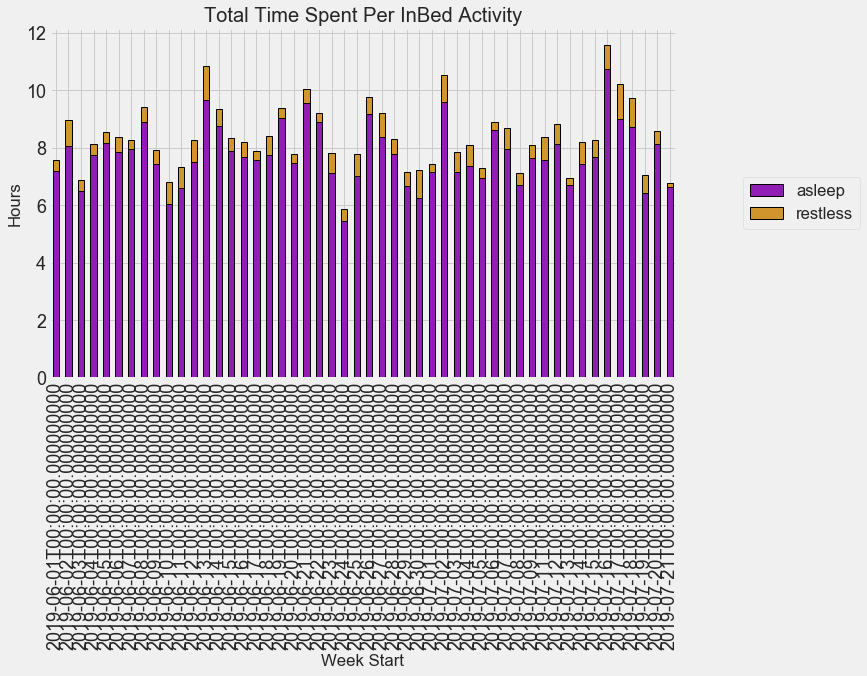

In [434]:
pivot_d2.plot.bar(stacked=True, 
                  color = colors_alt, 
                  figsize=(10,6),
                  edgecolor = 'black', 
                  linewidth = 1)

plt.xticks(pos, objects)
plt.xticks(rotation=90)
plt.legend(category_list_alt , bbox_to_anchor=(1.2,0.5), loc="center")


plt.ylabel('Hours')
plt.xlabel('Week Start')
plt.title('Total Time Spent Per ' + category_column)
plt.show()
